0.16 vendidos 2
0.53 vendidos 4
0.69 vendidos 2
0.88 vendidos 3
1.00 vendidos 3
1.01 vendidos 1
1.11 vendidos 3
1.44 vendidos 3
1.61 vendidos 2
1.97 vendidos 1
1.99 vendidos 4
1.99 se ha realizado un pedido de 28
2.08 vendidos 2
2.38 vendidos 4
2.79 vendidos 4
3.11 vendidos 4
3.26 vendidos 4
3.28 vendidos 1
3.46 vendidos 2
3.99 pedido recibido, 29 en inventario
4.04 vendidos 4
4.06 vendidos 4
4.06 se ha realizado un pedido de 29
4.12 vendidos 4
4.39 vendidos 1
4.56 vendidos 1
4.63 vendidos 2
4.82 vendidos 1
4.92 vendidos 1


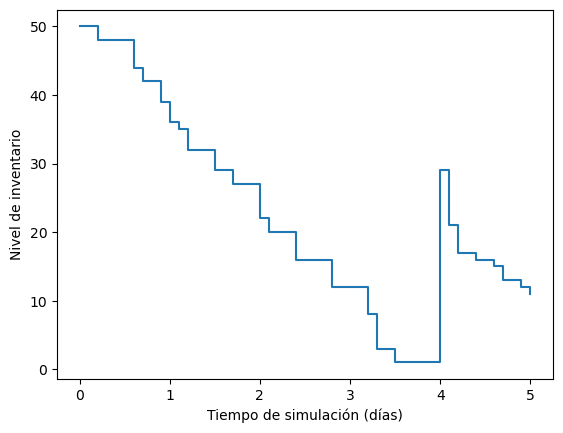

In [6]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

inventory = 0
balance = 0.0
num_ordered = 0
obs_time = []
inventory_level = []

def warehouse_run(env, order_cutoff, order_target):
    global inventory, balance, num_ordered

    inventory = order_target
    balance = 0.0
    num_ordered = 0

    while True:
        interarrival = generate_interarrival()
        yield env.timeout(interarrival)
        balance -= inventory * 2 * interarrival
        demand = generate_demand()
        if demand < inventory:
            balance += 100 * demand
            inventory -= demand
            print('{:.2f} vendidos {}'.format(env.now, demand))
        else:
            balance += 100 * inventory
            inventory = 0
            print('{:.2f} vendidos {} (sin stock)'.format(env.now, inventory))
        if inventory < order_cutoff and num_ordered == 0:
            env.process(handle_order(env, order_target))

def handle_order(env, order_target):
    global inventory, balance, num_ordered

    num_ordered = order_target - inventory
    print('{:.2f} se ha realizado un pedido de {}'.format(env.now, num_ordered))
    balance -= 50 * num_ordered
    yield env.timeout(2.0)
    inventory += num_ordered
    num_ordered = 0
    print('{:.2f} pedido recibido, {} en inventario'.format(env.now, inventory))

def generate_interarrival():
    return np.random.exponential(1.0 / 5)

def generate_demand():
    return np.random.randint(1, 5)

def observe(env):
    global inventory

    while True:
        obs_time.append(env.now)
        inventory_level.append(inventory)
        yield env.timeout(0.1)

np.random.seed(0)

env = simpy.Environment()
env.process(warehouse_run(env, 25, 50))
env.process(observe(env))

env.run(until=5.0)

plt.figure()
plt.step(obs_time, inventory_level, where='post')
plt.xlabel('Tiempo de simulación (días)')
plt.ylabel('Nivel de inventario')

plt.show()
